# Bay wheel Data exploratory and visualization
## by Tien Duong

## Investigation Overview

The purpose of this project is explore, analyze and visualize user's behaviors by using the `lyfy_bike_data.csv` of the month July to August 2020.

## Dataset Overview
This project is part of the Udacity's Data analysis program. The Dataset contain 13 columns and 154967 rows that extracted from the lyft webpage under bay-wheel >https://www.lyft.com/bikes/bay-wheels/system-data<. The dataset consist of `longtitude` and `latitude` coordinates. Ride_type and ID under `ride_id` and `ride_type`. Start_station_name and ID under `start_station_name` and `start_station_name_id`. End_station_name and ID under `end_station_name` and `end_station_name_id`. Membership type under `member_casual`.

In [8]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, Polygon

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('new_df.csv')

## 1 Visual

#### Horizontal bargraph of the top 10 stations started out with most bikes

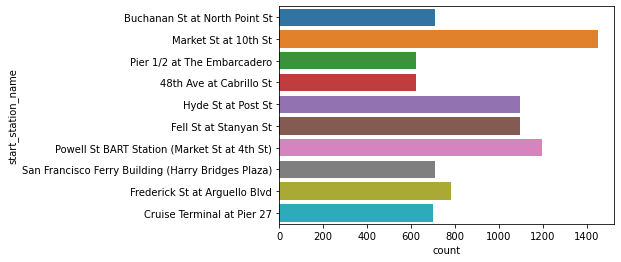

In [15]:
most_casual = df.groupby(['start_station_name']).agg('sum')
most_casual = most_casual.sort_values(by='time_duration', ascending=False)
top_casual_duration = most_casual[:10].index.tolist()
top10 = df.loc[df['start_station_name'].isin(top_casual_duration)].dropna()
sb.countplot(data=top10, y='start_station_name');

## 2 Visual
####  Bargraph of the relationship of 3 examine categorical variables

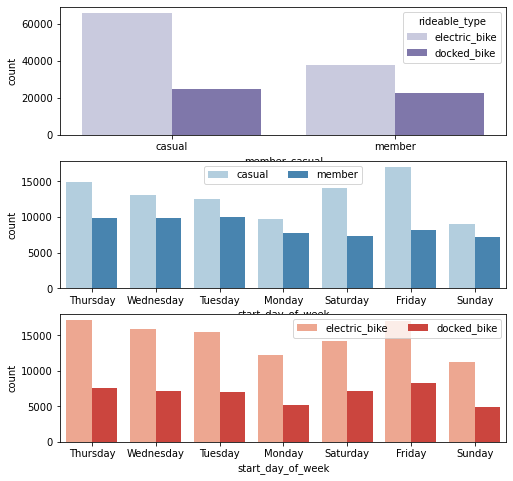

In [11]:
# Quick summary by plotting the relationship between 3 categorical types from the dataset
plt.figure(figsize = [8, 8])

plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'member_casual', hue = 'rideable_type', palette = 'Purples')

ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'start_day_of_week', hue = 'member_casual', palette = 'Blues')
ax.legend(ncol = 2)

ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'start_day_of_week', hue = 'rideable_type', palette = 'Reds')
ax.legend(loc = 1, ncol = 2) 

plt.show()

## 3 Visual
#### plot A, plotting the relationship of day of the week with bike type and average duration of ride, and Plot B, plotting the relationship of day of week with user type and average duration of ride. 

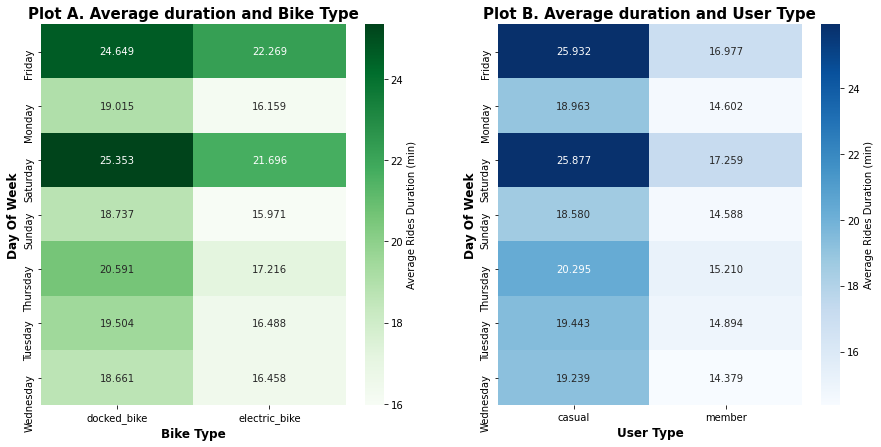

In [12]:
#--Calculating the average of ride's duration
#--Transforming the data in a pivot table to plot the heatmap
plt.figure(figsize=[15,7])
c_ = df.groupby(['member_casual','start_day_of_week']).mean()['time_duration']
c_ = c_.reset_index(name = 'average_duration')
c_ = c_.pivot(index = 'start_day_of_week', columns = 'member_casual', 
                            values = 'average_duration')

b_ = df.groupby(['rideable_type','start_day_of_week']).mean()['time_duration']
b_ = b_.reset_index(name = 'average_duration')
b_ = b_.pivot(index = 'start_day_of_week', columns = 'rideable_type', 
                            values = 'average_duration')
plt.subplot(1,2,2)
sb.heatmap(c_, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'Blues')

plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
plt.ylabel('Day of week'.title(),
               fontsize = 12, weight = "bold");
plt.title('Plot B. Average duration and User Type', weight='bold', fontsize=15)

plt.subplot(1,2,1)
sb.heatmap(b_, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'Greens')
plt.xlabel('Bike Type'.title(),
               fontsize = 12, weight = "bold")
plt.ylabel('Day of week'.title(),
               fontsize = 12, weight = "bold");
plt.title('Plot A. Average duration and Bike Type', weight='bold',fontsize=15);

## 4 Visual
##### Graph of the given coordinates of longtitude and latitude on top of Bay Area Map

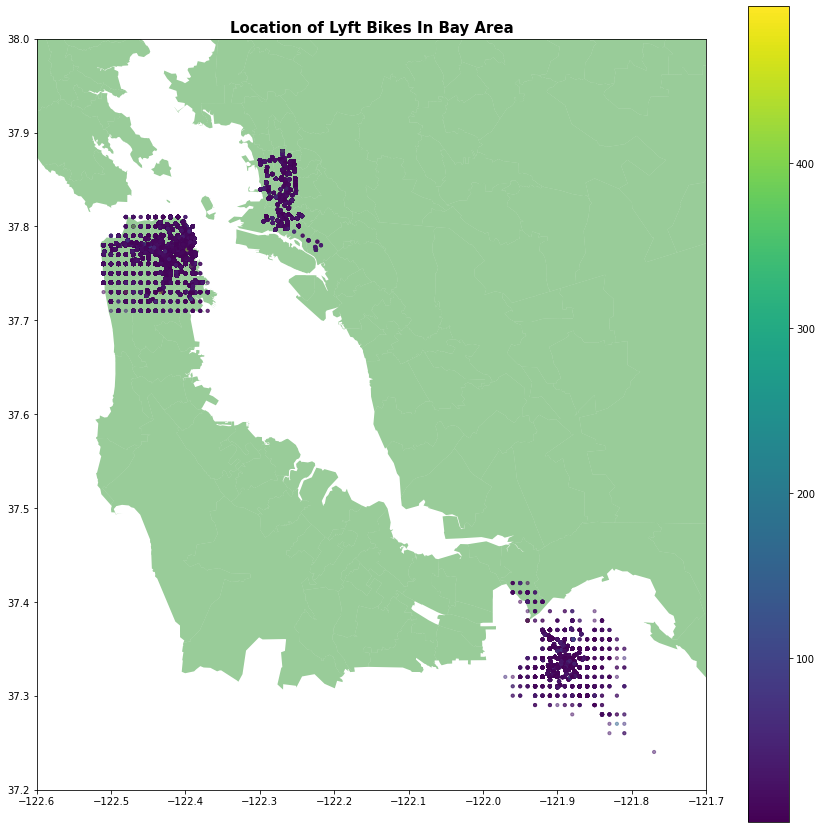

In [13]:
street_map = gpd.read_file('geo_export_ade4f47c-e11e-43b0-8565-83ef2c278f4c.shp')
# keys for assign for coorinate variable
crs = {"init":"EPSG:4326"}
# zip x and y coordinate under one feature
geometry = [Point(xy) for xy in zip(df['start_lng'],
                                    df['start_lat'])]

# Convert file in geodataframe
geo_df = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
# Extract the variable columns
geo_df = df[['geometry','time_duration']]
# Finalize and convert the extract file again to geodataframe
geo_df = gpd.GeoDataFrame(geo_df,crs=crs, geometry=geometry)

# create subplot
fix,ax = plt.subplots(figsize=(15,15));
# plotting the shapefile
street_map.plot(ax=ax, alpha=0.4, color='green')
# plotting our coordinates
geo_df.plot(column='time_duration', ax=ax, alpha=0.5,
           legend=True, markersize=10);
# plot labels
plt.title('Location of Lyft Bikes In Bay Area',fontsize=15, fontweight='bold')

plt.xlim(-122.6,-121.7)
plt.ylim(37.2,38)
plt.show();